In [1]:
import os,sys
os.chdir('../../')
sys.path.append('./src/probability')
sys.path.append('./src/data')
sys.path.append('./src/events')
from event_processing import to_hist
from importerDC import get_aeff_df_dc, get_systematics, DC2015_MC, DC2018_MC,DC2018_event_data, DC2015_event_data, DC2018_systematics
from processerDC import interpolate_flux_DC, process_aeff, get_flux,get_true
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


ImportError: cannot import name 'get_true' from 'importerDC' (./src/data\importerDC.py)

In [ ]:
track = True
cascade = False
systematics2018 = DC2018_systematics(track=track,cascade=cascade)
events2018 = DC2018_event_data(track=track,cascade=cascade)
MC2018 = DC2018_MC(track=track, cascade=cascade)
# binning definition from readme file
Ebins_2018 = [5.623413,  7.498942, 10. , 13.335215, 17.782795, 23.713737, 31.622776, 42.16965 , 56.23413]
zbins_2018 = [-1., -0.75, -0.5 , -0.25,  0., 0.25, 0.5, 0.75, 1.]

In [ ]:
get_true(flavor=14,pid=1,E_bin=0,z_bin=0,df=MC2018)

In [131]:
df1[num_mask].true_coszen.values

array([-0.63692063, -0.83109945, -0.86389434, ..., -0.89560986,
       -0.31654453, -0.44193166])

In [117]:
probs = np.zeros_like(df1["reco_energy"])
df1[num_mask]

,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight
135878,14.0,1.0,-0.625,11.7,-0.881053,4.071509,2.0,2.179285e-10
135891,14.0,1.0,-0.625,6.6,-0.790186,2.681794,3.0,6.596992e-11
135896,14.0,1.0,-0.625,8.7,-0.980585,4.933139,1.0,3.780049e-10
135899,14.0,1.0,-0.875,20.7,-0.911355,4.784835,2.0,3.471021e-10
135900,14.0,1.0,-0.125,6.6,0.077694,3.456085,1.0,1.363407e-10
...,...,...,...,...,...,...,...,...
760784,14.0,1.0,-0.625,36.9,-0.714635,22.975456,0.0,3.550306e-08
760801,14.0,1.0,-0.125,11.7,-0.542045,12.524984,0.0,5.915438e-09
760805,14.0,1.0,-0.375,11.7,-0.565021,18.573225,0.0,1.875957e-08
760809,14.0,1.0,-0.625,20.7,-0.544827,82.165421,0.0,1.595879e-06


In [121]:
probs[num_mask] = f(df1[num_mask]["true_energy"], df1[num_mask]["true_coszen"])

In [79]:
MC2018['mu']

,reco_coszen,reco_energy,pid,pdg,rate_weight
0,-0.875,6.6,0.0,-14.0,96.153127
1,-0.875,6.6,0.0,14.0,211.561988
2,-0.875,6.6,1.0,-14.0,78.469026
3,-0.875,6.6,1.0,14.0,169.800803
4,-0.875,8.7,0.0,-14.0,127.338050
...,...,...,...,...,...
251,0.875,36.9,1.0,14.0,50.232012
252,0.875,49.2,0.0,-14.0,12.458569
253,0.875,49.2,0.0,14.0,47.725396
254,0.875,49.2,1.0,-14.0,8.132708


In [47]:
def get_hist(df, weight):
    '''retrieve histogram in (energy x coszen) space'''
    hist, _, _ = np.histogram2d(df['reco_energy'], df['reco_coszen'], bins=(Ebins_2018, zbins_2018), weights=df[weight])
    return hist
def plot(hist, ax):
    '''plot a 2d map'''
    pc = ax.pcolormesh(Ebins_2018, zbins_2018, hist.T)
    plt.gcf().colorbar(pc, ax=ax)
    ax.set_xscale('log')
    ax.set_xlabel('Energy (GeV)')
    ax.set_ylabel(r'$\cos{\theta}$')

In [68]:
events = get_hist(events2018.query('reco_coszen <= 0'), 'count_events') 
muon_background = get_hist(events2018.query('reco_coszen <= 0'), 'count_background') 
mc = []
for key in MC2018.keys():
    raw = get_hist(MC2018[key].query('reco_coszen <= 0'), weight='rate_weight')
    correction = get_hist(systematics2018[key].query('reco_coszen <= 0'), weight='correction_factor')
    mc.append(raw * correction)

In [69]:
events

array([[196., 210., 242., 224.,   0.,   0.,   0.,   0.],
       [176., 171., 247., 206.,   0.,   0.,   0.,   0.],
       [216., 194., 253., 281.,   0.,   0.,   0.,   0.],
       [177., 208., 262., 336.,   0.,   0.,   0.,   0.],
       [182., 212., 326., 464.,   0.,   0.,   0.,   0.],
       [133., 217., 342., 496.,   0.,   0.,   0.,   0.],
       [121., 224., 295., 389.,   0.,   0.,   0.,   0.],
       [129., 192., 242., 313.,   0.,   0.,   0.,   0.]])

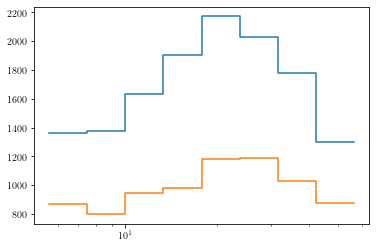

In [70]:
mc_E = np.sum(np.sum(mc,axis=0),axis=1)
events_E = np.sum(events,axis=1)
plt.step(Ebins_2018, mc_E.tolist()+ [mc_E[-1]], where='post')
plt.step(Ebins_2018, events_E.tolist()+ [events_E[-1]], where='post')
plt.xscale('log')

Text(0.5, 1.0, 'corrected')

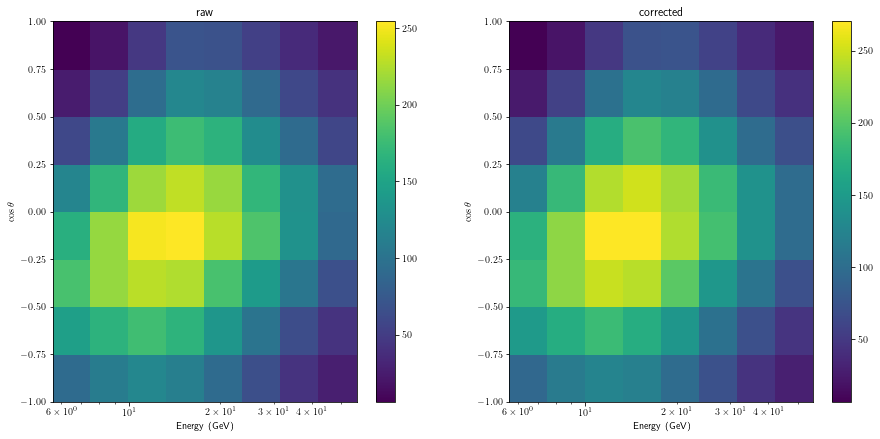

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plot(raw, ax[0])
plot(raw * correction, ax[1])

ax[0].set_title('raw')
ax[1].set_title('corrected')

In [4]:
def filter_quantile(lista,quant):
    new_list = []
    for df in lista:
        new = df[(df.zmin > df.zmin.quantile(1-quant)) & (df.zmin < df.zmin.quantile(quant)) & (df.Emin > df.Emin.quantile(1-quant)) & (df.Emin < df.Emin.quantile(quant)) ]
        new_list.append(new)
    return new_list


In [71]:
interp_flux = interpolate_flux_DC()
df_list = get_aeff_df_dc()

quant = 1
e_list = filter_quantile(process_aeff(df_list[0]), quant)
ebar_list = filter_quantile(process_aeff(df_list[1]), quant)
mu_list = filter_quantile(process_aeff(df_list[2]), quant)
mubar_list = filter_quantile(process_aeff(df_list[3]), quant)
tau_list = filter_quantile(process_aeff(df_list[4]), quant)
taubar_list = filter_quantile(process_aeff(df_list[5]), quant)
nc_list = filter_quantile(process_aeff(df_list[6]), quant)
ncbar_list = filter_quantile(process_aeff(df_list[7]), quant)

NameError: name 'filter_quantile' is not defined

In [76]:
df_list[2][1].

,z,E,aeff_Mu,zmin,zmax,Emin,Emax,E_avg,z_avg
1,"-1.000,-0.995","0.723,0.729",1.956000e-07,-1.000,-0.995,0.723,0.729,0.7260,-0.9975
2,"-1.000,-0.995","0.780,0.786",2.387000e-07,-1.000,-0.995,0.780,0.786,0.7830,-0.9975
3,"-1.000,-0.995","0.792,0.799",2.598000e-07,-1.000,-0.995,0.792,0.799,0.7955,-0.9975
4,"-1.000,-0.995","0.811,0.818",2.831000e-07,-1.000,-0.995,0.811,0.818,0.8145,-0.9975
5,"-1.000,-0.995","0.824,0.830",2.967000e-07,-1.000,-0.995,0.824,0.830,0.8270,-0.9975
...,...,...,...,...,...,...,...,...,...
945,"0.341,0.346","1.083,1.089",9.376000e-07,0.341,0.346,1.083,1.089,1.0860,0.3435
946,"0.356,0.361","1.177,1.184",1.409000e-06,0.356,0.361,1.177,1.184,1.1805,0.3585
947,"0.361,0.366","0.874,0.881",3.699000e-07,0.361,0.366,0.874,0.881,0.8775,0.3635
948,"0.371,0.376","1.385,1.392",3.756000e-06,0.371,0.376,1.385,1.392,1.3885,0.3735


In [6]:
Ereco = 10**np.linspace(0.80,1.75,9)
zreco = np.linspace(-1,0,9)#[0:-1]
livetime = 953*24*3600

In [7]:
e_res = []
for aeff_df in e_list:
    aeff_df['flux'] = get_flux('e',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_E*aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.flux
    e_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
e_res = np.array(e_res).reshape(8,8)

ebar_res = []
for aeff_df in ebar_list:
    aeff_df['flux'] = get_flux('ebar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_EBar*aeff_df.flux*aeff_df.DOMeff*aeff_df.ICEeff
    ebar_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
ebar_res = np.array(ebar_res).reshape(8,8)

mu_res = []
for aeff_df in mu_list:
    aeff_df['flux'] = get_flux('m',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_Mu*aeff_df.flux*aeff_df.DOMeff*aeff_df.ICEeff
    mu_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
mu_res = np.array(mu_res).reshape(8,8)

mubar_res = []
for aeff_df in mubar_list:
    aeff_df['flux'] = get_flux('mbar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_Mubar*aeff_df.flux*aeff_df.DOMeff*aeff_df.ICEeff
    mubar_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
mubar_res = np.array(mubar_res).reshape(8,8)

nc_res = []
for aeff_df in nc_list:
    aeff_df['flux_e'] = get_flux('e',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['flux_m'] = get_flux('m',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.aeff_X*(aeff_df.flux_e + aeff_df.flux_m)
    nc_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
nc_res = np.array(nc_res).reshape(8,8)

ncbar_res = []
for aeff_df in ncbar_list:
    aeff_df['flux_ebar'] = get_flux('ebar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['flux_mbar'] = get_flux('mbar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.aeff_XBar*(aeff_df.flux_ebar + aeff_df.flux_mbar)
    ncbar_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
ncbar_res = np.array(ncbar_res).reshape(8,8)


<ipython-input-7-5d42aa11be80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aeff_df['flux'] = get_flux('e',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
<ipython-input-7-5d42aa11be80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_E*aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.flux
<ipython-input-7-5d42aa11be80>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [30]:
res = mu_res+mubar_res#+e_res+ebar_res+nc_res+ncbar_res
#Får bättre fit med bara mu ...

In [19]:
MC_2015 = DC2015_MC()
MC_2018 = DC2018_MC()
events_2015 = DC2015_event_data()
events_2018 = DC2018_event_data()
res_E = np.sum(res,axis=0)
res_z = np.sum(res,axis=1)
MC2015_E = np.sum(MC_2015,axis=1)
MC2015_z = np.sum(MC_2015,axis=0)
MC2018_E = np.sum(MC_2018,axis=0).values
MC2018_z = np.sum(MC_2018,axis=1).values

data2018_E = np.sum(events_2018,axis=0).values
data2018_z = np.sum(events_2018,axis=1).values
data2015_E = np.sum(events_2015.events,axis=0).values
data2015_z = np.sum(events_2015.events,axis=1).values


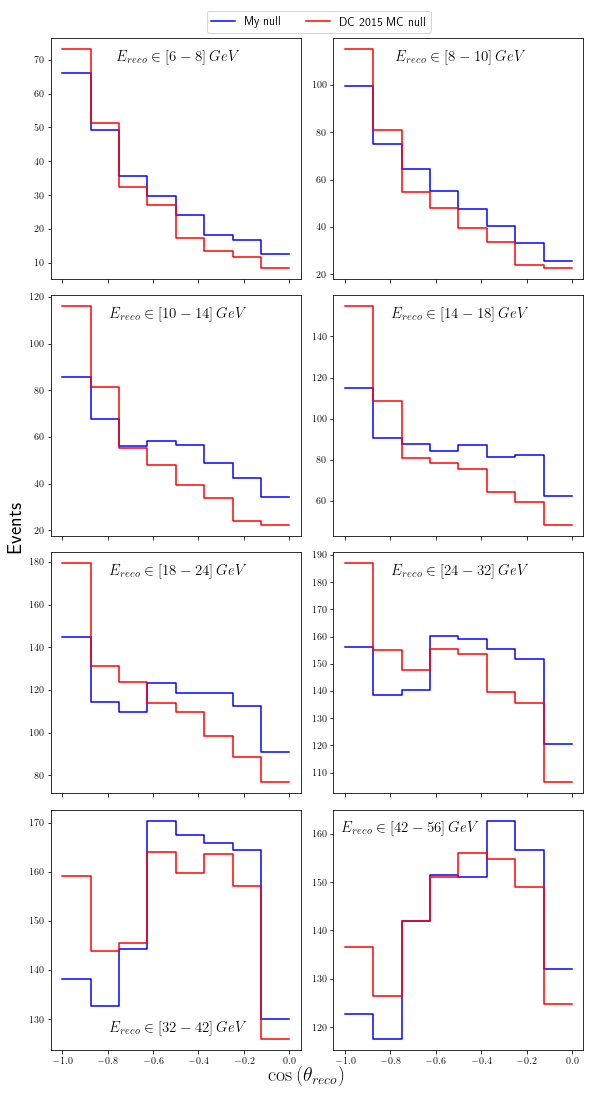

In [31]:
from scipy.optimize import leastsq 
fig, ax = plt.subplots(4,2, sharex=True, squeeze=True, figsize=(8,15))
ax = ax.flatten()
zreco_midpoints = zreco[0:-1] +np.diff(zreco)/2
title_pos = [(0.5,0.88)]*8
title_pos[6] = (0.5,0.05)
title_pos[7] = (0.3,0.88)
Ebins = Ereco.astype(int)
for i in range(8):
    norms = leastsq(lambda x:x*res[:,i]-MC_2015[i], x0=10)[0]
    res_hist = to_hist(res[:,i]*norms)
    MC_hist = to_hist(MC_2015[i])
    data = DC2015_event_data().events.iloc[:,i].values
    ax[i].step(zreco, res_hist, where='post', label='My null', color='blue')
    ax[i].step(zreco, MC_hist, where='post', label='DC 2015 MC null', color='red')
    #ax[i].scatter(zreco_midpoints, data, label='DC data', color='black')
    ax[i].set_title(rf'$E_{{reco}} \in [{Ebins[i]}-{Ebins[i+1]}] \, GeV$',x = title_pos[i][0], y = title_pos[i][1], fontsize=15)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.35,0.97), ncol=3, fontsize=12)
fig.suptitle(r'$\cos{(\theta_{{reco}})}$',y=0.01,fontsize=20)
fig.tight_layout()
_=ax[4].set_ylabel('Events', fontsize=20, x=-1.1,y=1.1)

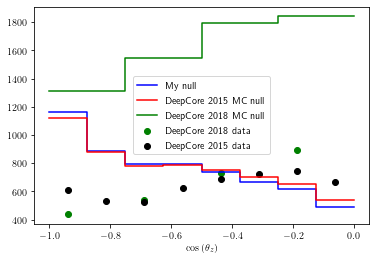

In [27]:
norms = leastsq(lambda x:x*res_z-MC2015_z, x0=10)[0]
plt.step(zreco, to_hist(res_z*norms), label='My null', color='blue',where='post')
plt.step(zreco, to_hist(MC2015_z), label='DeepCore 2015 MC null', color='red', where='post')
plt.step(zreco[::2], to_hist(MC2018_z/5), label='DeepCore 2018 MC null', color='green', where='post')
#plt.scatter(zreco_midpoints[::2], data2018_z*0.33, label='DeepCore 2018 data', color='green')
#plt.scatter(zreco_midpoints, data2015_z, label='DeepCore 2015 data', color='black')
plt.xlabel(r'$\cos{(\theta_z)}$')
plt.legend()

(0.0, 2000.0)

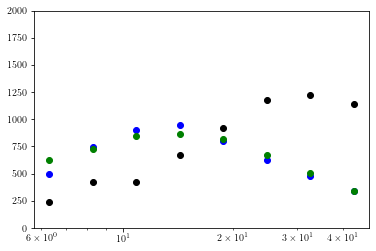

In [20]:
norms = leastsq(lambda x:x*res_E-MC2015_E, x0=10)[0]
plt.scatter(Ereco[0:-1], res_E*norms, label='My null', color='blue')
plt.scatter(Ereco[0:-1], MC2015_E, label='DeepCore 2015 MC null', color='black')
plt.scatter(Ereco[0:-1], MC2018_E/6, label='DeepCore 2018 MC null', color='green')
plt.xscale('log')
plt.ylim((0,2000))